<a href="https://www.kaggle.com/code/faressayah/cifar-10-images-classification-using-cnns-88?scriptVersionId=117995466" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 📷 Cifar-10 Image Classifiction

The `CIFAR-10` dataset consists of `60000` `32x32` color images in `10` classes, with `6000` images per class. There are `50000` training images and `10000` test images.

# 🔬 Problem Definition:

Given an image, can we predict the correct class of this image?

The images are very small (`32x32`) and by visualizing them you will notice how difficult it is to distinguish them even for a human. 

In this notebook we are going to build a CNN model that can classify images of various objects. We have `10` class of images:
1. Airplane
2. Automobile
3. Bird
4. Cat
5. Deer
6. Dog
7. Frog
8. Horse
9. Ship
10. Truck

# 🎯 Evaluation:

We have `10` classes, so if we pick a image and we randomly gues it class, we have `1/10` probability to be true.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

# 📥 Load the data

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


# 🖼 Data Visualization

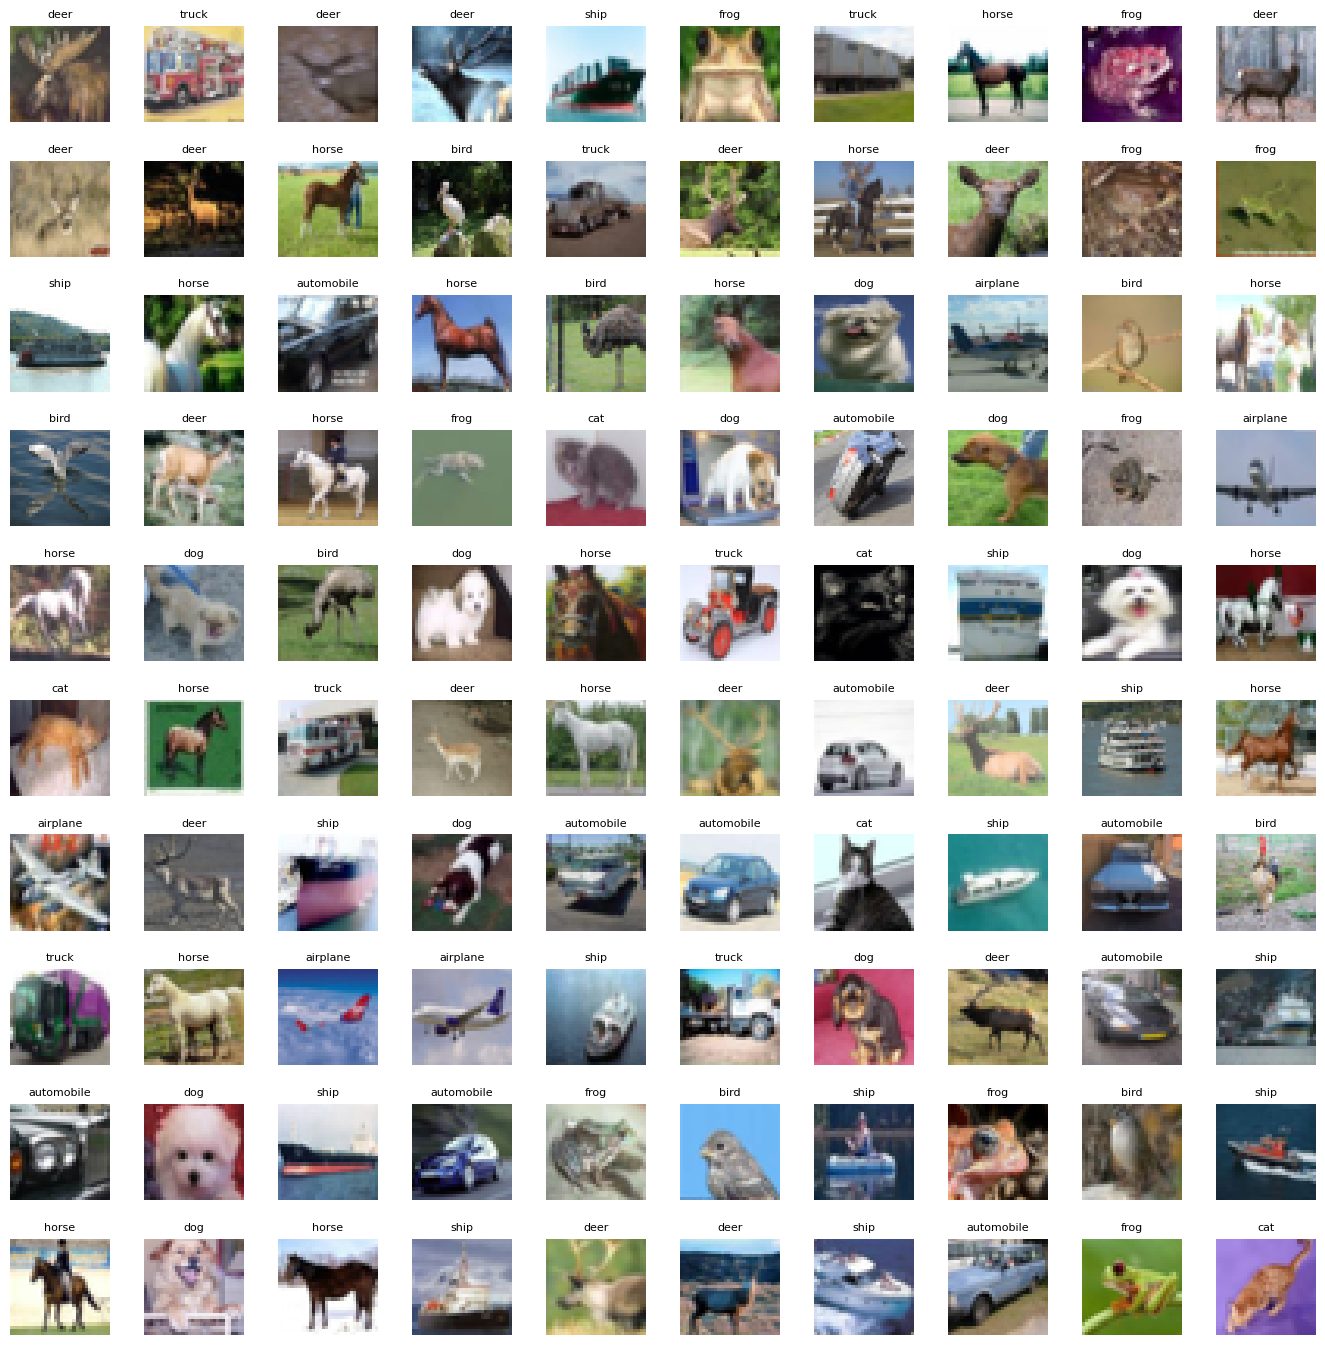

In [3]:
# Define the labels of the dataset
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']

# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 10
L_grid = 10

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_train = len(X_train) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow(X_train[index,1:])
    label_index = int(y_train[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

Text(0.5, 1.0, 'Class distribution in training set')

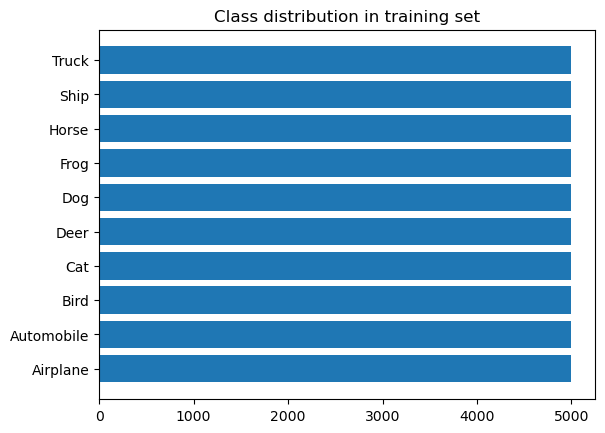

In [4]:
classes_name = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

classes, counts = np.unique(y_train, return_counts=True)
plt.barh(classes_name, counts)
plt.title('Class distribution in training set')

Text(0.5, 1.0, 'Class distribution in testing set')

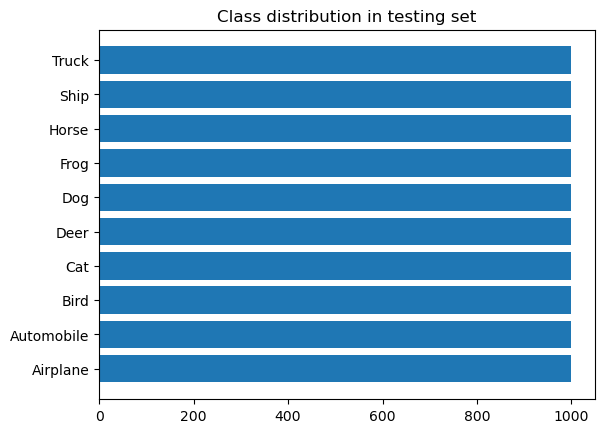

In [5]:
classes, counts = np.unique(y_test, return_counts=True)
plt.barh(classes_name, counts)
plt.title('Class distribution in testing set')

The class are equally distributed

# 🔄 Data Preprocessing

In [6]:
# Scale the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Transform target variable into one-hotencoding
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [7]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

# 🤖 Model Building

In [8]:
INPUT_SHAPE = (32, 32, 3)
KERNEL_SIZE = (3, 3)
model = Sequential()

# Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
# Pooling layer
model.add(MaxPool2D(pool_size=(2, 2)))
# Dropout layers
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
# model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)

/Users/efg5335/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,29

 Total params: 552,362 (2.11 MB)

 Trainable params: 551,466 (2.10 MB)

 Non-trainable params: 896 (3.50 KB)

## Early Stopping

In [10]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [22]:
print(X_train.shape[0])

50000


## Data Augmentations

In [12]:
batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, y_cat_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size

r = model.fit(train_generator, 
              epochs=20,
              steps_per_epoch=steps_per_epoch,
              validation_data=(X_test, y_cat_test), 
#               callbacks=[early_stop],
#               batch_size=batch_size,
             )

Epoch 1/20
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 123s 79ms/step - accuracy: 0.3553 - loss: 1.7638 - precision: 0.5673 - recall: 0.1394 - val_accuracy: 0.4907 - val_loss: 1.5355 - val_precision: 0.6470 - val_recall: 0.3337
Epoch 2/20
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 2:34 99ms/step - accuracy: 0.6250 - loss: 1.2511 - precision: 0.7059 - recall: 0.3750

2024-04-29 10:04:09.370888: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Users/efg5335/anaconda3/lib/python3.11/contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6250 - loss: 1.2511 - precision: 0.7059 - recall: 0.3750 - val_accuracy: 0.4800 - val_loss: 1.5838 - val_precision: 0.6334 - val_recall: 0.3277
Epoch 3/20
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 121s 77ms/step - accuracy: 0.5459 - loss: 1.2894 - precision: 0.7139 - recall: 0.3696 - val_accuracy: 0.6006 - val_loss: 1.1366 - val_precision: 0.7302 - val_recall: 0.4960
Epoch 4/20
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 2:51 110ms/step - accuracy: 0.5312 - loss: 1.1477 - precision: 0.6364 - recall: 0.4375

2024-04-29 10:06:16.648839: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5312 - loss: 1.1477 - precision: 0.6364 - recall: 0.4375 - val_accuracy: 0.6033 - val_loss: 1.1248 - val_precision: 0.7312 - val_recall: 0.5000
Epoch 5/20
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 115s 74ms/step - accuracy: 0.6262 - loss: 1.0712 - precision: 0.7598 - recall: 0.4914 - val_accuracy: 0.6521 - val_loss: 1.0591 - val_precision: 0.7339 - val_recall: 0.5833
Epoch 6/20
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 1:37 63ms/step - accuracy: 0.6875 - loss: 0.8759 - precision: 0.7083 - recall: 0.5312

2024-04-29 10:08:17.080482: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6875 - loss: 0.8759 - precision: 0.7083 - recall: 0.5312 - val_accuracy: 0.6529 - val_loss: 1.0594 - val_precision: 0.7340 - val_recall: 0.5837
Epoch 7/20
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 114s 73ms/step - accuracy: 0.6655 - loss: 0.9696 - precision: 0.7891 - recall: 0.5452 - val_accuracy: 0.6980 - val_loss: 0.8915 - val_precision: 0.7754 - val_recall: 0.6259
Epoch 8/20
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 2:01 78ms/step - accuracy: 0.6562 - loss: 1.0452 - precision: 0.7200 - recall: 0.5625

2024-04-29 10:10:15.857350: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6562 - loss: 1.0452 - precision: 0.7200 - recall: 0.5625 - val_accuracy: 0.6985 - val_loss: 0.8928 - val_precision: 0.7754 - val_recall: 0.6284
Epoch 9/20
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 113s 72ms/step - accuracy: 0.6984 - loss: 0.8889 - precision: 0.8019 - recall: 0.5918 - val_accuracy: 0.7430 - val_loss: 0.7442 - val_precision: 0.8207 - val_recall: 0.6822
Epoch 10/20
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 1:59 77ms/step - accuracy: 0.6875 - loss: 0.6593 - precision: 0.7826 - recall: 0.5625

2024-04-29 10:12:14.328053: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6875 - loss: 0.6593 - precision: 0.7826 - recall: 0.5625 - val_accuracy: 0.7455 - val_loss: 0.7367 - val_precision: 0.8236 - val_recall: 0.6847
Epoch 11/20
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 111s 71ms/step - accuracy: 0.7188 - loss: 0.8204 - precision: 0.8220 - recall: 0.6274 - val_accuracy: 0.7178 - val_loss: 0.8670 - val_precision: 0.7873 - val_recall: 0.6557
Epoch 12/20
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 1:43 66ms/step - accuracy: 0.8750 - loss: 0.5197 - precision: 0.8846 - recall: 0.7188

2024-04-29 10:14:10.622575: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8750 - loss: 0.5197 - precision: 0.8846 - recall: 0.7188 - val_accuracy: 0.7213 - val_loss: 0.8572 - val_precision: 0.7903 - val_recall: 0.6588
Epoch 13/20
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 112s 72ms/step - accuracy: 0.7389 - loss: 0.7691 - precision: 0.8293 - recall: 0.6545 - val_accuracy: 0.7506 - val_loss: 0.7322 - val_precision: 0.8342 - val_recall: 0.6895
Epoch 14/20
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 1:44 67ms/step - accuracy: 0.7812 - loss: 0.7122 - precision: 0.8846 - recall: 0.7188

2024-04-29 10:16:07.737892: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7812 - loss: 0.7122 - precision: 0.8846 - recall: 0.7188 - val_accuracy: 0.7481 - val_loss: 0.7432 - val_precision: 0.8324 - val_recall: 0.6843
Epoch 15/20
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 109s 70ms/step - accuracy: 0.7527 - loss: 0.7241 - precision: 0.8375 - recall: 0.6748 - val_accuracy: 0.7564 - val_loss: 0.7353 - val_precision: 0.8259 - val_recall: 0.6872
Epoch 16/20
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 2:08 82ms/step - accuracy: 0.8125 - loss: 0.5381 - precision: 0.8929 - recall: 0.7812

2024-04-29 10:18:02.245225: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8125 - loss: 0.5381 - precision: 0.8929 - recall: 0.7812 - val_accuracy: 0.7574 - val_loss: 0.7271 - val_precision: 0.8280 - val_recall: 0.6902
Epoch 17/20
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 107s 69ms/step - accuracy: 0.7640 - loss: 0.7020 - precision: 0.8425 - recall: 0.6852 - val_accuracy: 0.7537 - val_loss: 0.7371 - val_precision: 0.8130 - val_recall: 0.7101
Epoch 18/20
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 2:16 88ms/step - accuracy: 0.7188 - loss: 0.6856 - precision: 0.8400 - recall: 0.6562

2024-04-29 10:19:54.356849: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7188 - loss: 0.6856 - precision: 0.8400 - recall: 0.6562 - val_accuracy: 0.7550 - val_loss: 0.7350 - val_precision: 0.8136 - val_recall: 0.7109
Epoch 19/20
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 111s 71ms/step - accuracy: 0.7745 - loss: 0.6656 - precision: 0.8517 - recall: 0.7072 - val_accuracy: 0.7935 - val_loss: 0.6229 - val_precision: 0.8566 - val_recall: 0.7406
Epoch 20/20
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 1:39 64ms/step - accuracy: 0.8750 - loss: 0.5343 - precision: 1.0000 - recall: 0.7188

2024-04-29 10:21:49.965541: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8750 - loss: 0.5343 - precision: 1.0000 - recall: 0.7188 - val_accuracy: 0.7902 - val_loss: 0.6318 - val_precision: 0.8553 - val_recall: 0.7369


# 📊 Model Evaluation

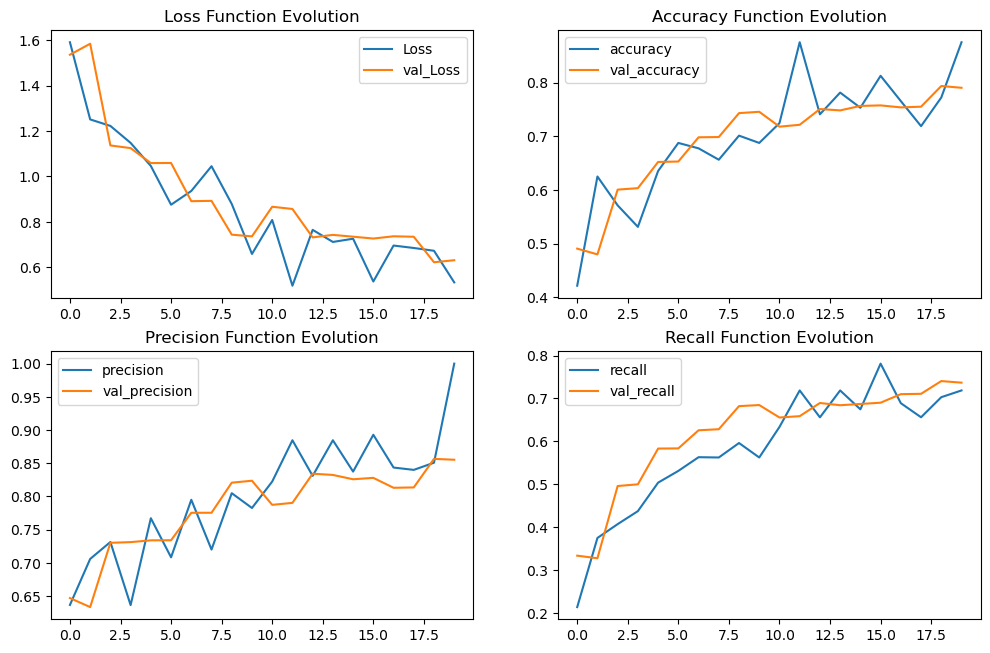

In [13]:
plt.figure(figsize=(12, 16))

plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_Loss')
plt.title('Loss Function Evolution')
plt.legend()

plt.subplot(4, 2, 2)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Function Evolution')
plt.legend()

plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision Function Evolution')
plt.legend()

plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.title('Recall Function Evolution')
plt.legend()

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.7917 - loss: 0.6252 - precision: 0.8546 - recall: 0.7374
Test Accuracy : 79.02%
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step


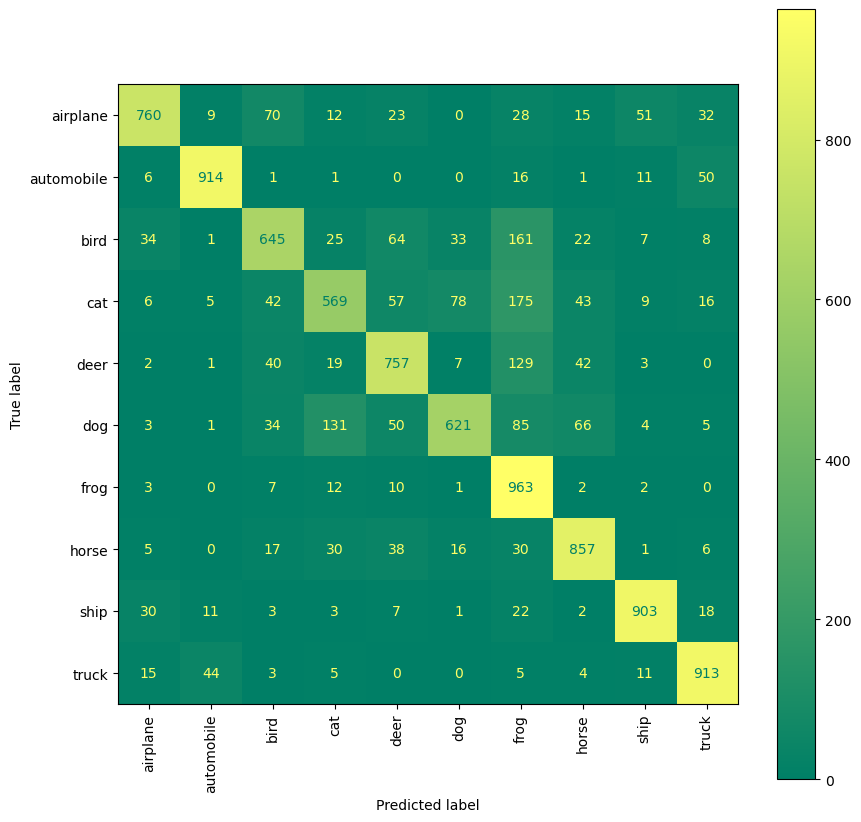

In [14]:
evaluation = model.evaluate(X_test, y_cat_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)


# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.76      0.82      1000
           1       0.93      0.91      0.92      1000
           2       0.75      0.65      0.69      1000
           3       0.71      0.57      0.63      1000
           4       0.75      0.76      0.75      1000
           5       0.82      0.62      0.71      1000
           6       0.60      0.96      0.74      1000
           7       0.81      0.86      0.83      1000
           8       0.90      0.90      0.90      1000
           9       0.87      0.91      0.89      1000

    accuracy                           0.79     10000
   macro avg       0.80      0.79      0.79     10000
weighted avg       0.80      0.79      0.79     10000



## Test on one image

 Image 100 is [4]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
The model predict that image 100 is 7


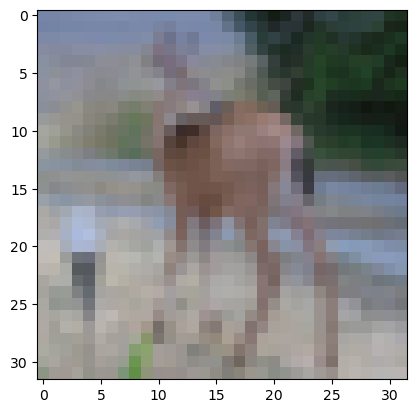

In [16]:
my_image = X_test[100]
plt.imshow(my_image)

# that's a Deer
print(f" Image 100 is {y_test[100]}")

# correctly predicted as a Deer
pred_100 = np.argmax(model.predict(my_image.reshape(1, 32, 32, 3)))
print(f"The model predict that image 100 is {pred_100}")

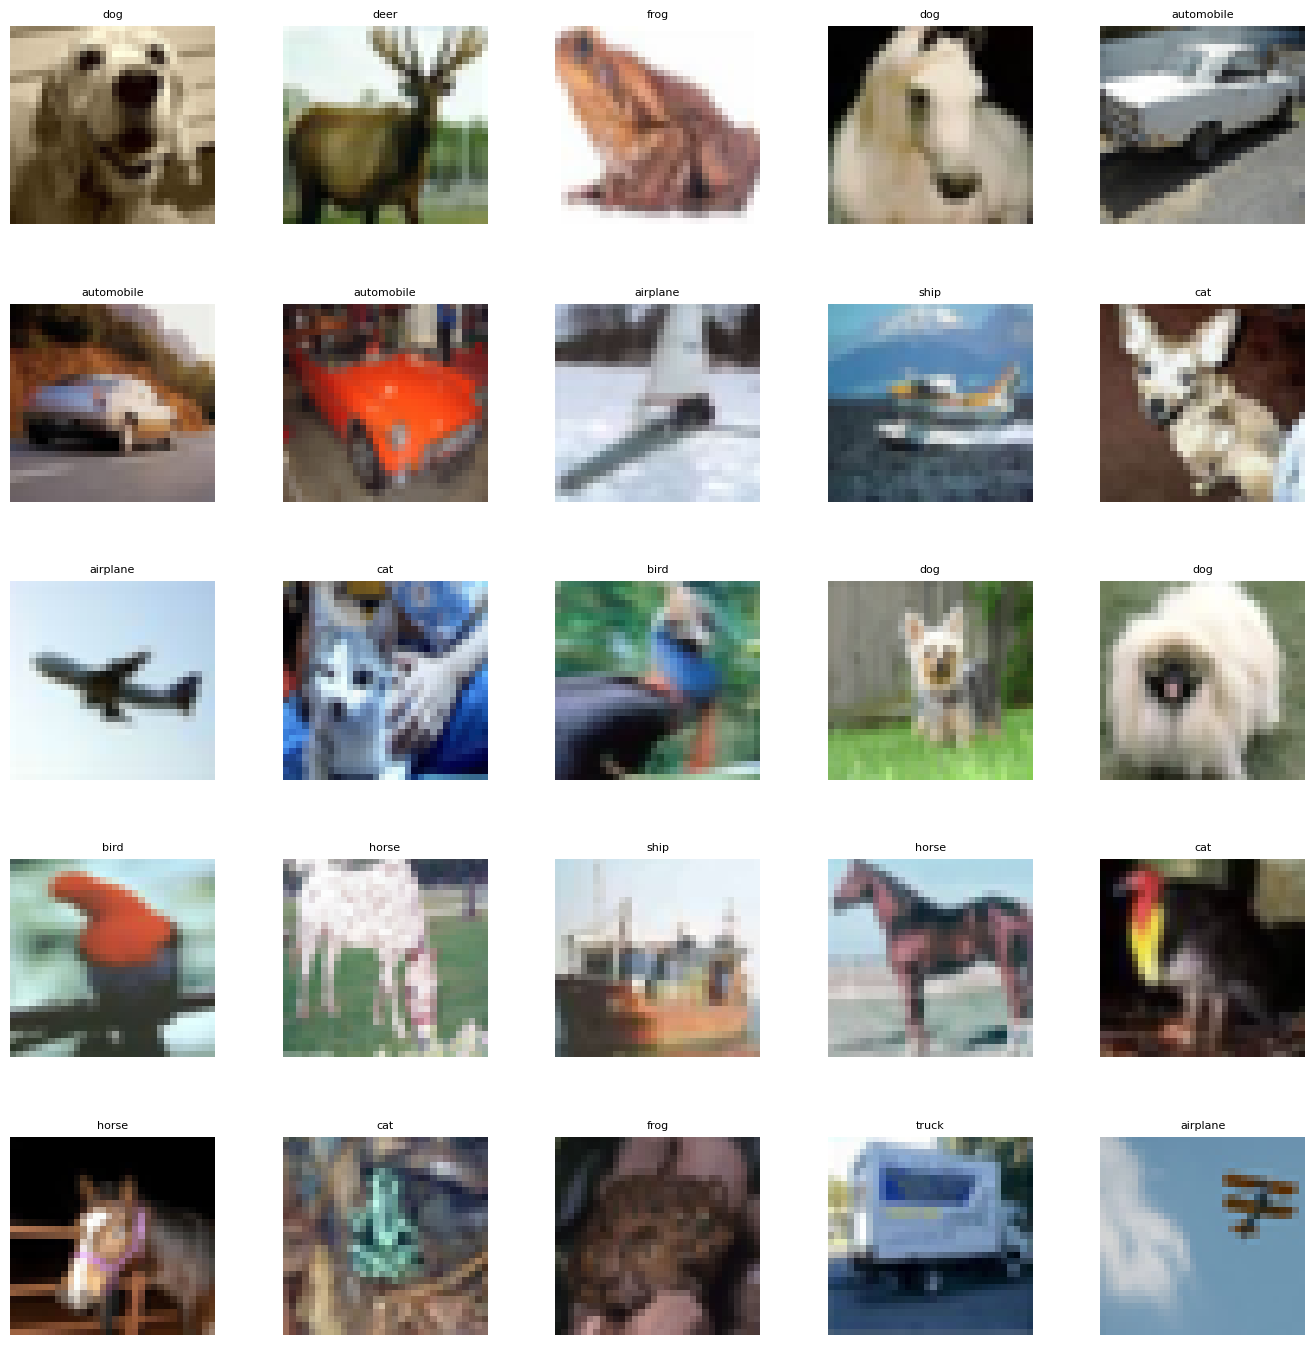

In [17]:
# Define the labels of the dataset
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']

# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 5
L_grid = 5

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_test = len(X_test) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_test)
    # read and display an image with the selected index    
    axes[i].imshow(X_test[index,1:])
    label_index = int(y_pred[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [18]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{labels[int(predicted_label)]} {100*np.max(predictions_array):2.0f}% ({labels[int(true_label)]})", 
               color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, int(true_label[i])
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step


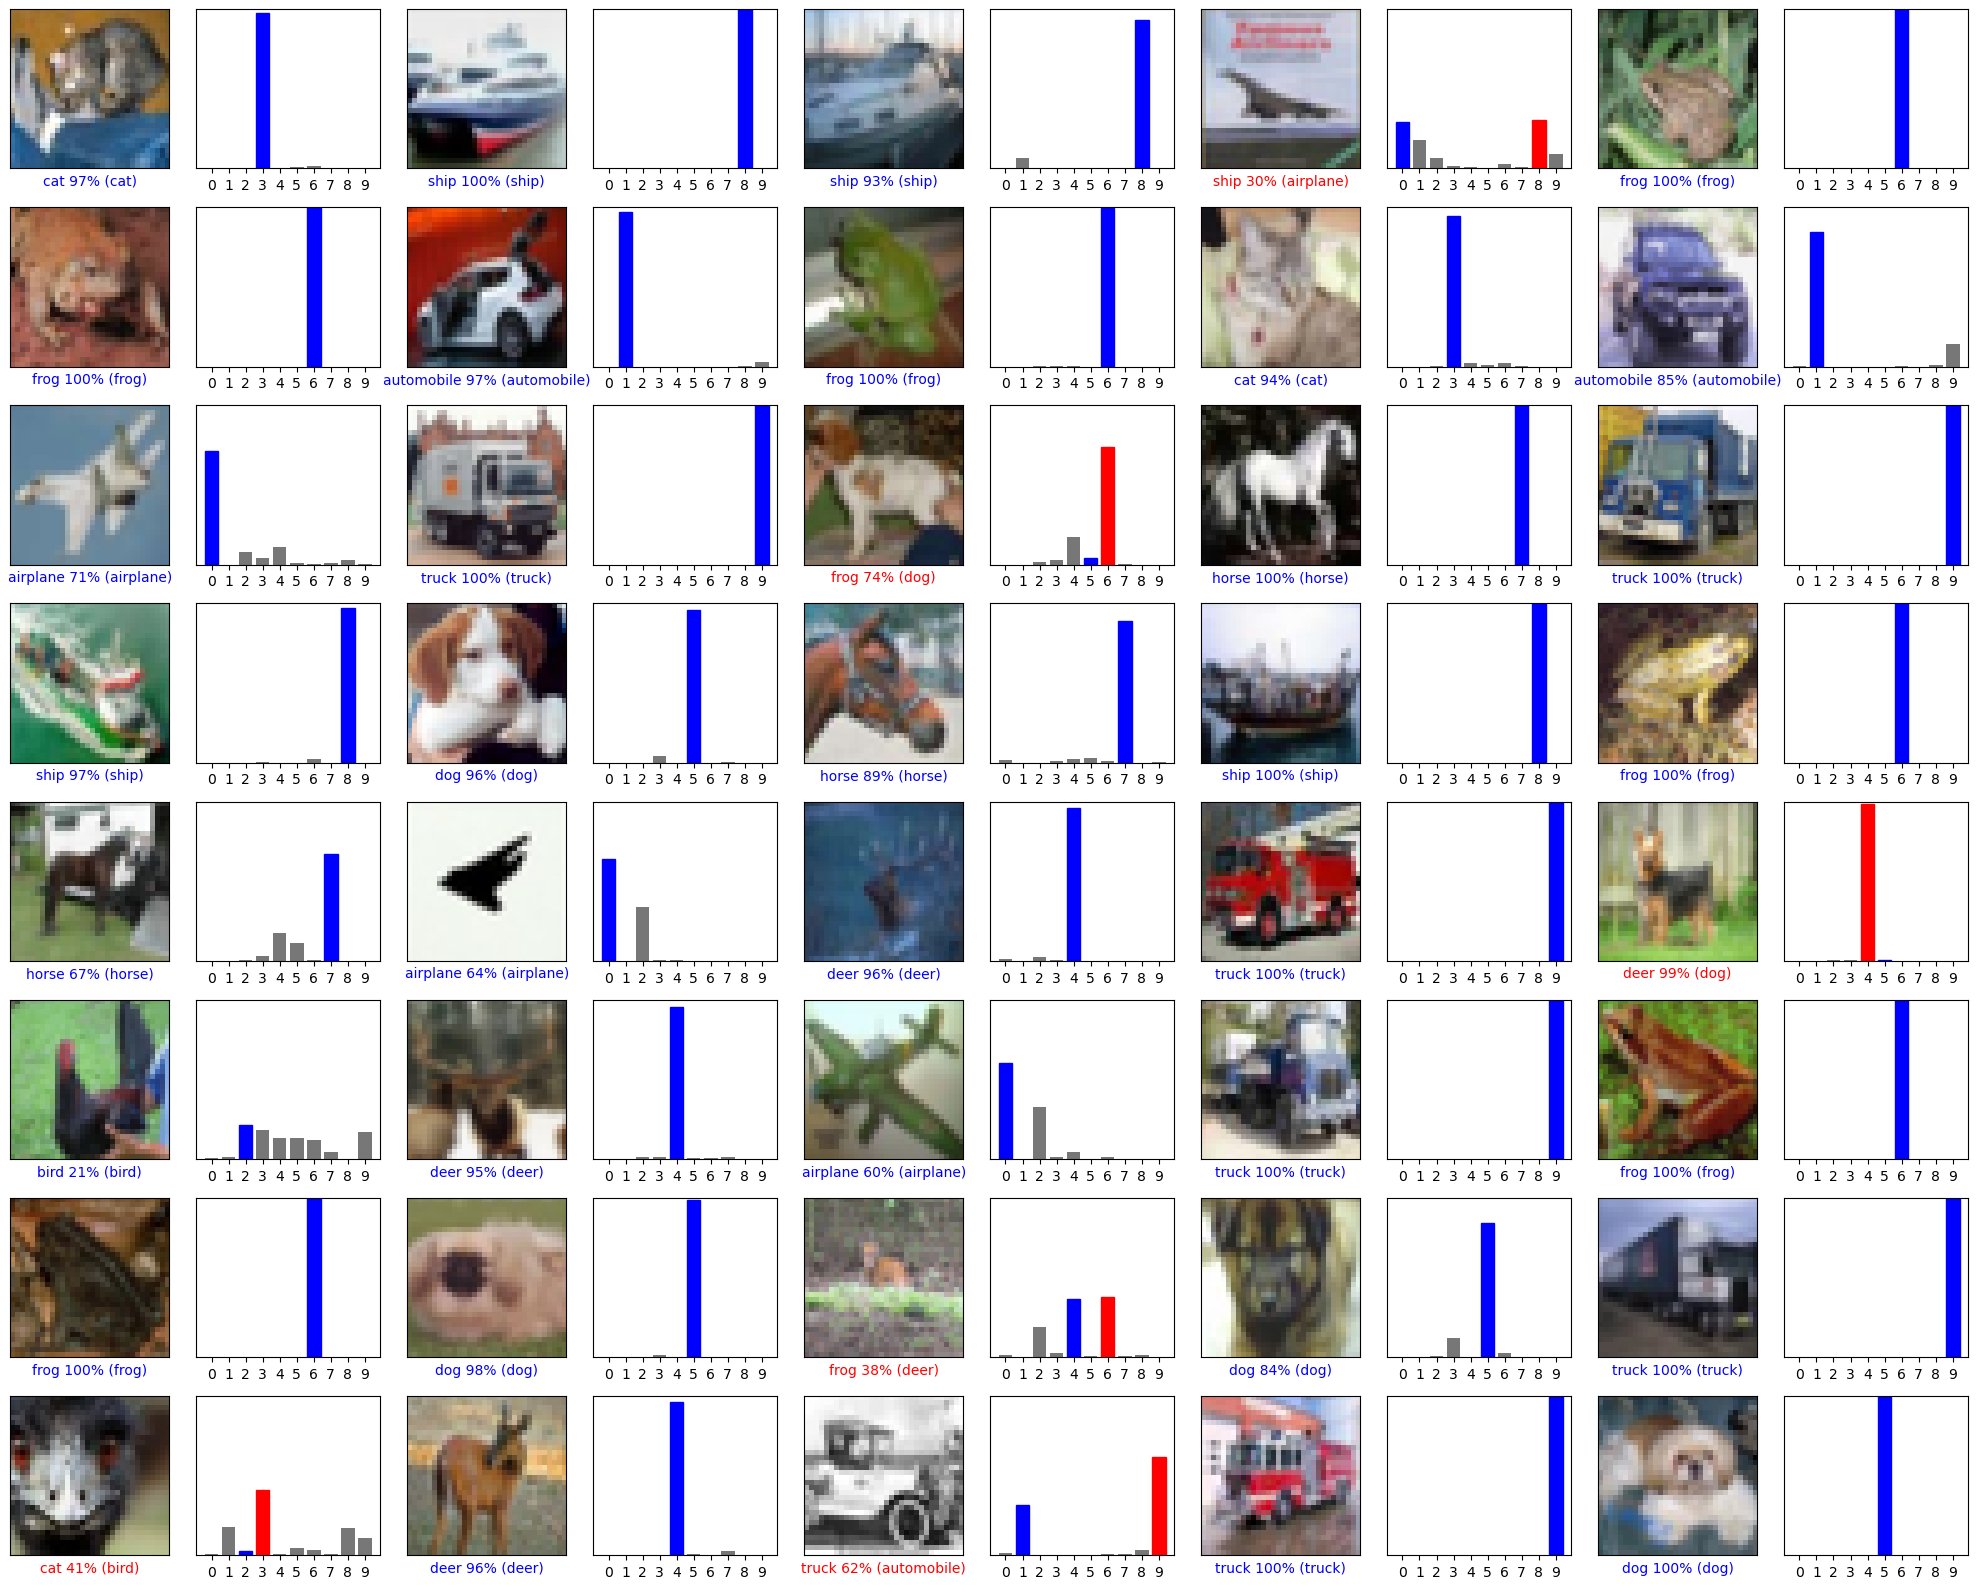

In [19]:
predictions = model.predict(X_test)

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 8
num_cols = 5
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], y_test, X_test)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

# 6. DenseNet model for image classification

In [20]:
from keras.applications.densenet import DenseNet121
from keras.layers import Dense
from keras.models import Sequential

model = Sequential()
base_model = DenseNet121(input_shape=(32, 32, 3), include_top=False, weights='imagenet', pooling='avg')
model.add(base_model)
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

r = model.fit(train_generator, 
              epochs=100,
              steps_per_epoch=steps_per_epoch,
              validation_data=(X_test, y_cat_test), 
#               callbacks=[early_stop],
             )

Epoch 1/100
Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/efg5335/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/y_/r_kzdxgj2ln51k47rx7c71pnsb1_bx/T/ipykernel_66281/3995032110.py", line 11, in <module>
    r = model.fit(train_generator,
       ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/efg5335/anaconda3/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/Users/efg5335/anaconda3/lib/python3.11/site-packages/keras/src/backend/tensorflow/trainer.py", line 314, in fit
    logs = self.train_function(iterator)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/efg5335/anaconda3/lib/python3.11/site-packages/tensorflow/python/util/traceback_utils.py", line 150, in error_handler
    return fn(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^
  File "/Users/efg5335/an

# 7. Save the models

In [20]:
from tensorflow.keras.models import load_model

model.save('cnn_20_epochs.h5')